**DeepImageSearch**



In [ ]:
!pip install DeepImageSearch

In [ ]:
from DeepImageSearch import Index, LoadData, SearchImage
!unzip 'cleaned_data.zip'
image_list = LoadData().from_folder(["cleaned_data"])

In [ ]:
Index(image_list).Start()

In [ ]:
image_list[150]

'Fill/repeat-circle.png'

In [ ]:
!unzip 'cleaned_data.zip'

In [ ]:
SearchImage().plot_similar_images(image_path=image_list[150])

**Tensorflow Classification Model**




In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
  
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(13, activation='softmax')
    ])


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 64)     

In [ ]:
model.compile(loss=tf.losses.sparse_categorical_crossentropy,
              optimizer="adam",
              metrics=["acc"])

In [ ]:
dataset=tf.keras.utils.image_dataset_from_directory("cleaned_data",seed=123,image_size=(128,128))

Found 3927 files belonging to 13 classes.


In [ ]:
dataset=dataset.map(lambda x,y: (x/255, y))

In [ ]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

In [ ]:
history = model.fit(train,validation_data=val,epochs=15,verbose=1)

Epoch 1/15
86/86 [==============================] - 42s 487ms/step - loss: 1.7670 - acc: 0.4364 - val_loss: 1.2178 - val_acc: 0.6641
Epoch 2/15
86/86 [==============================] - 42s 489ms/step - loss: 0.8232 - acc: 0.7576 - val_loss: 0.9337 - val_acc: 0.7435
Epoch 3/15
86/86 [==============================] - 42s 482ms/step - loss: 0.4461 - acc: 0.8634 - val_loss: 0.7685 - val_acc: 0.8099
Epoch 4/15
86/86 [==============================] - 42s 482ms/step - loss: 0.2372 - acc: 0.9328 - val_loss: 0.7810 - val_acc: 0.8333
Epoch 5/15
86/86 [==============================] - 41s 478ms/step - loss: 0.1550 - acc: 0.9564 - val_loss: 0.8996 - val_acc: 0.8294
Epoch 6/15
86/86 [==============================] - 41s 480ms/step - loss: 0.1047 - acc: 0.9742 - val_loss: 0.7139 - val_acc: 0.8685
Epoch 7/15
86/86 [==============================] - 43s 495ms/step - loss: 0.0836 - acc: 0.9782 - val_loss: 0.7697 - val_acc: 0.8555
Epoch 8/15
86/86 [==============================] - 40s 467ms/step - 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

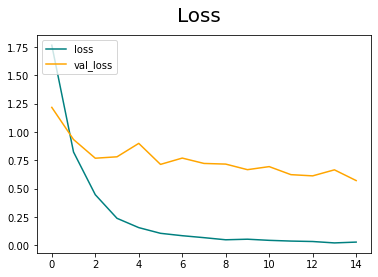

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

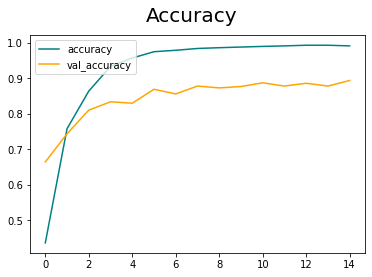

In [ ]:

fig = plt.figure()
plt.plot(history.history['acc'], color='teal', label='accuracy')
plt.plot(history.history['val_acc'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('Revolicon.h5')

In [ ]:
from PIL import Image
test_img = Image.open("test_heart.jpg").resize((128, 128))
img = np.array(test_img) 
img.shape


(128, 128, 3)

In [ ]:
class_names=['arrow','clipboard','else','globe','heart','home','lock','music','pencil','photo','plane','speaker','weather']
result=model.predict(img)
print(class_names[result.tolist()[0].index(1)])